<a href="https://colab.research.google.com/github/Udhay2898/project/blob/Master/ICC_Test_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Pandas**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read CSV File from Drive**

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Highest Average.csv')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


**Check Null Values**

In [42]:
df.isnull().any()

Player    False
Span      False
Mat       False
Inns      False
NO        False
Runs      False
HS        False
Ave       False
BF        False
SR        False
100       False
50        False
0         False
4s        False
6s        False
dtype: bool

**Check The Duplicates**

In [43]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
60    False
61    False
62    False
63    False
64    False
Length: 65, dtype: bool

**Find the Duplicates**

In [44]:
df[df['Player'].duplicated()==1]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
5,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
25,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,29437+,54.04,51,68,14,2058+,69
53,V Kohli (IND),2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26


**List the Duplicates**

In [45]:
df[df['Player'].isin(['RG Pollock (SA)','SR Tendulkar (IND)','V Kohli (IND)'])]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
5,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
24,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,29437+,54.04,51,68,14,2058+,69
25,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,29437+,54.04,51,68,14,2058+,69
52,V Kohli (IND),2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26
53,V Kohli (IND),2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26


**Drop the Duplicates**

In [46]:
df = df.drop_duplicates()

**Check the Duplicates are Droped or Not**

In [47]:
df[df['Player'].isin(['RG Pollock (SA)','SR Tendulkar (IND)','V Kohli (IND)'])]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
24,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,29437+,54.04,51,68,14,2058+,69
52,V Kohli (IND),2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26


**Split up Span into Debut and Retired**

In [48]:
df['Debut'] = df['Span'].str.split(pat='-').str[0]
df['Retired'] = df['Span'].str.split(pat='-').str[1]
df.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Debut,Retired
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.6,29,13,7,626+,6,1928,1948


**Drop the Span**

In [49]:
df = df.drop(['Span'],axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Debut,Retired
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


**Split up into Player and Country**

In [50]:
df['Country'] = df['Player'].str.split(pat = '(' ).str[1]
df['Country'] = df['Country'].str.split(pat = ')').str[0]
df.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Debut,Retired,Country
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948,AUS
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG


**Split up into HS ,BF , 4s and 6s**

In [51]:
df['HS'] = df['HS'].str.split(pat = '*' ).str[0]
df['BF'] = df['BF'].str.split(pat = '+' ).str[0]
df['4s'] = df['4s'].str.split(pat = '+' ).str[0]
df['6s'] = df['6s'].str.split(pat = '+' ).str[0]
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Debut,Retired,Country
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges (AUS),20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley (WI),22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI


**Check the Data type of Dataframe**

In [52]:
df.dtypes

Player      object
Mat          int64
Inns         int64
NO           int64
Runs         int64
HS          object
Ave        float64
BF          object
SR         float64
100          int64
50           int64
0            int64
4s          object
6s          object
Debut       object
Retired     object
Country     object
dtype: object

**Replace 'NaN' and '-' with 0**

In [53]:
df = df.replace('-',0)
df = df.replace('NaN',0)

**Type Casting**

In [54]:
df = df.astype({'Player':'str','HS':'int','BF':'int','4s':'int','6s':'int','Debut':'int','Retired':'int'})

**Change the Column Name**

In [55]:
df = df.rename(columns={'Mat':'Matchs','NO':'Not_Outs','HS':'High_Score','BF':'Ball_Faced','SR':'Strike_Rate'})
df.head(5)

,Player,Matchs,Inns,Not_Outs,Runs,High_Score,Ave,Ball_Faced,Strike_Rate,100,50,0,4s,6s,Debut,Retired,Country
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges (AUS),20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley (WI),22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI


**Calculation with Dataframe**

**Add collumn to Find the Career Length of each player**

In [56]:
df['Career_Length'] = df['Retired'] - df['Debut']
df.head(3)

,Player,Matchs,Inns,Not_Outs,Runs,High_Score,Ave,Ball_Faced,Strike_Rate,100,50,0,4s,6s,Debut,Retired,Country,Career_Length
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,1
2,AC Voges (AUS),20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1


**Find the Mean value of Career Length of all Players**

In [57]:
df['Career_Length'].mean()

13.193548387096774

**Find the Strike Rate of Players who Played more then 10 years
and also its Average**

In [66]:
df[df['Career_Length']>10]['Strike_Rate']

0     58.60
4     56.00
6     34.59
8     42.42
10    38.07
11    53.58
12    54.19
13    53.50
14    46.22
15     0.00
16    39.34
17    45.97
19    51.41
22    51.53
23    63.88
24    54.04
26    60.51
27    45.99
28    42.51
29    52.39
30    52.12
31    58.72
35    43.31
36    43.35
37    48.64
38    60.10
39    54.51
40    41.09
42    69.77
43    38.81
44    51.45
45    56.52
46    54.02
48    40.16
49    30.04
50    82.23
52    55.56
54    55.92
56    29.11
57     0.00
58    46.92
59    43.74
60    49.16
61    59.67
Name: Strike_Rate, dtype: float64

In [67]:
df[df['Career_Length']>10]['Strike_Rate']

0     58.60
4     56.00
6     34.59
8     42.42
10    38.07
11    53.58
12    54.19
13    53.50
14    46.22
15     0.00
16    39.34
17    45.97
19    51.41
22    51.53
23    63.88
24    54.04
26    60.51
27    45.99
28    42.51
29    52.39
30    52.12
31    58.72
35    43.31
36    43.35
37    48.64
38    60.10
39    54.51
40    41.09
42    69.77
43    38.81
44    51.45
45    56.52
46    54.02
48    40.16
49    30.04
50    82.23
52    55.56
54    55.92
56    29.11
57     0.00
58    46.92
59    43.74
60    49.16
61    59.67
Name: Strike_Rate, dtype: float64

In [68]:
df[df['Career_Length']>10]['Strike_Rate'].mean()

47.94681818181819

In [82]:
# Count number of players played by each country
Players_count = df['Country'].value_counts().reset_index()
Players_count.columns = ['Country', 'Players_count']
print(Players_count)

    Country  Players_count
0       AUS             16
1       ENG             13
2        WI              8
3        SA              5
4       IND              4
5       PAK              4
6        SL              3
7    ICC/SA              2
8        NZ              2
9   ICC/IND              2
10   ICC/WI              1
11      ZIM              1
12  ICC/PAK              1


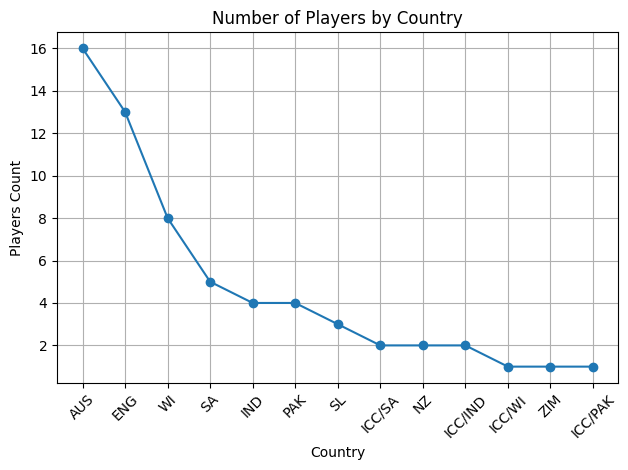

In [83]:
plt.plot(Players_count['Country'], Players_count['Players_count'], marker='o', linestyle='-')
plt.xlabel('Country')
plt.ylabel('Players Count')
plt.title('Number of Players by Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

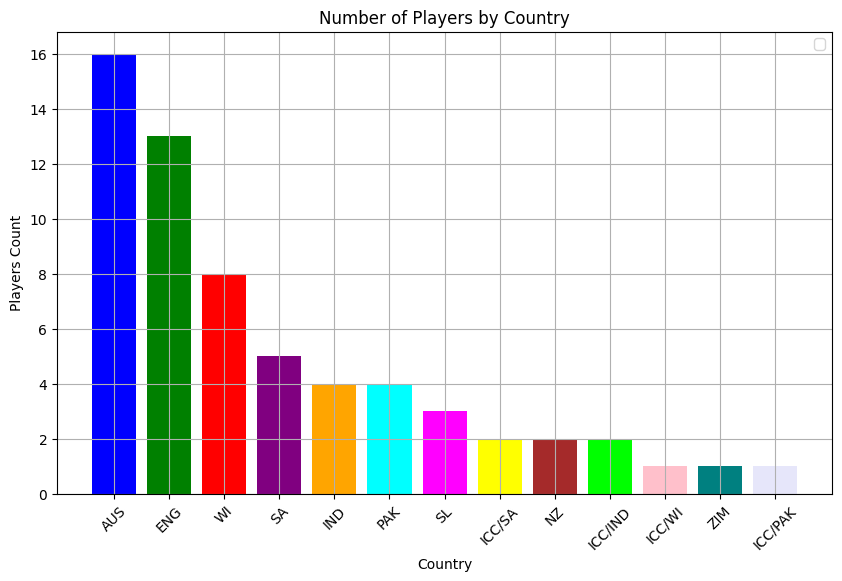

In [84]:
# Define colors for each country
colors = ['blue', 'green', 'red', 'purple', 'orange',
          'cyan', 'magenta', 'yellow', 'brown', 'lime',
          'pink', 'teal', 'lavender', 'lightblue', 'darkgreen']

plt.figure(figsize=(10, 6))

# Plotting using a for loop
for i in range(len(Players_count)):
    plt.bar(Players_count['Country'][i],Players_count['Players_count'][i], color=colors[i])


plt.xlabel('Country')
plt.ylabel('Players Count')
plt.title('Number of Players by Country')

plt.xticks(rotation=45)
plt.grid()
plt.legend()

plt.show()

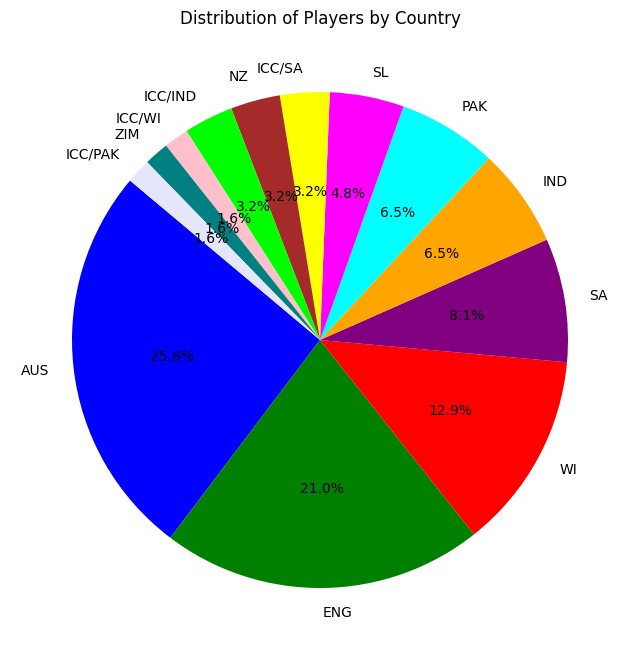

In [85]:
plt.figure(figsize=(8, 8))

plt.title('Distribution of Players by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Plotting using a pie chart
plt.pie(Players_count['Players_count'], labels=Players_count['Country'],colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.show()



In [86]:
# Group by 'Country' and calculate the sum of '50s' and '100s'
country_stats = df.groupby('Country')[['50', '100']].sum().reset_index()

# Display the result
print(country_stats)

    Country   50  100
0       AUS  454  330
1       ENG  271  161
2   ICC/IND   95   59
3   ICC/PAK   46   25
4    ICC/SA   96   72
5    ICC/WI   48   34
6       IND  146  118
7        NZ   44   37
8       PAK  112   85
9        SA  101   49
10       SL  132   86
11       WI  205  133
12      ZIM   27   12


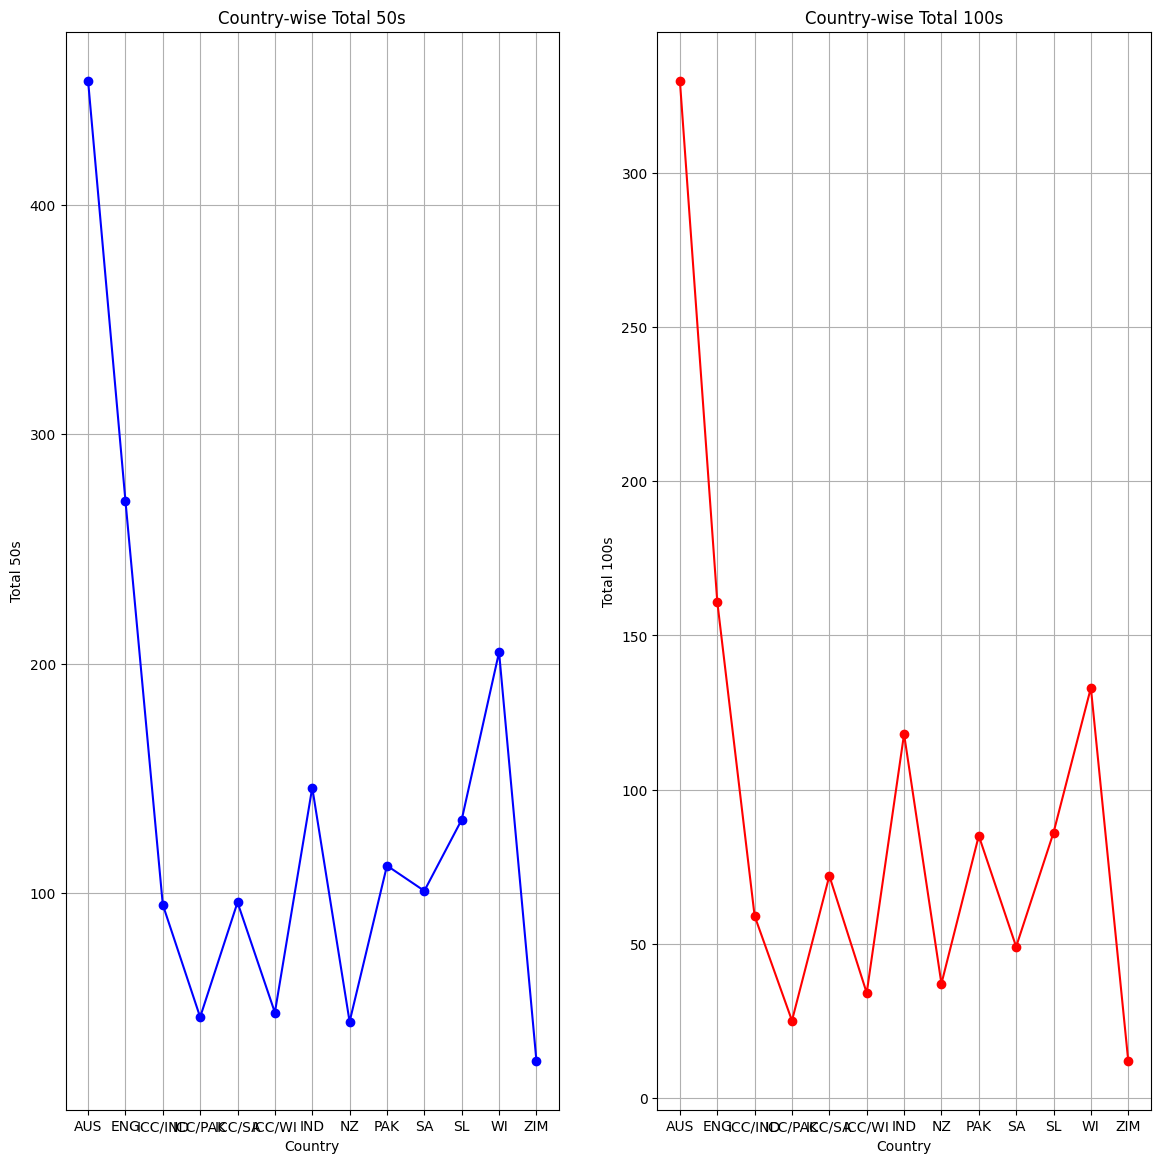

In [87]:
# Plotting
plt.figure(figsize=(14, 14))

# Plot for 50s
plt.subplot(1, 2, 1)
plt.plot(country_stats['Country'], country_stats['50'], marker='o', linestyle='-', color='b')
plt.title('Country-wise Total 50s')
plt.xlabel('Country')
plt.ylabel('Total 50s')
plt.grid(True)

# Plot for 100s
plt.subplot(1, 2, 2)
plt.plot(country_stats['Country'], country_stats['100'], marker='o', linestyle='-', color='r')
plt.title('Country-wise Total 100s')
plt.xlabel('Country')
plt.ylabel('Total 100s')
plt.grid(True)

plt.show()

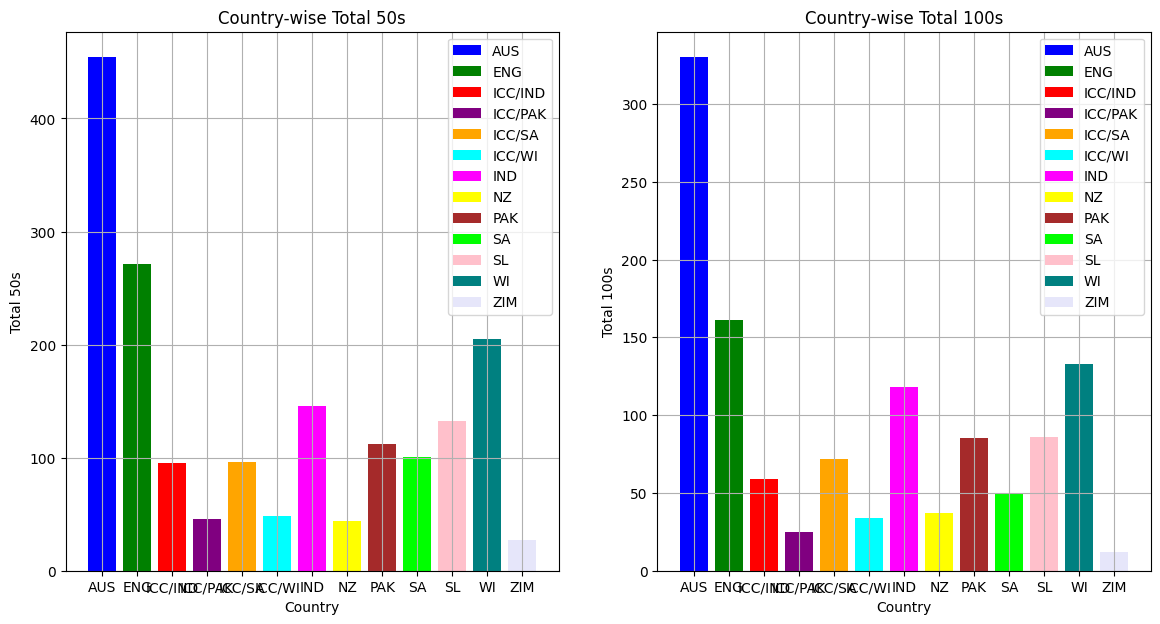

In [89]:
# Define colors for each country
colors = ['blue', 'green', 'red', 'purple', 'orange',
          'cyan', 'magenta', 'yellow', 'brown', 'lime',
          'pink', 'teal', 'lavender', 'lightblue', 'darkgreen']
# Plotting
plt.figure(figsize=(14, 7))

# Bar chart for 50s
plt.subplot(1, 2, 1)

for i in range(len(country_stats)):
    plt.bar(country_stats['Country'][i], country_stats['50'][i], color=colors[i],label=f'{country_stats["Country"][i]}')

plt.title('Country-wise Total 50s')
plt.xlabel('Country')
plt.ylabel('Total 50s')
plt.grid()
plt.legend()

# Bar chart for 100s
plt.subplot(1, 2, 2)
for i in range(len(country_stats)):
    plt.bar(country_stats['Country'][i], country_stats['100'][i], color=colors[i],label=f'{country_stats["Country"][i]}')

plt.title('Country-wise Total 100s')
plt.xlabel('Country')
plt.ylabel('Total 100s')
plt.grid()
plt.legend()


plt.show()

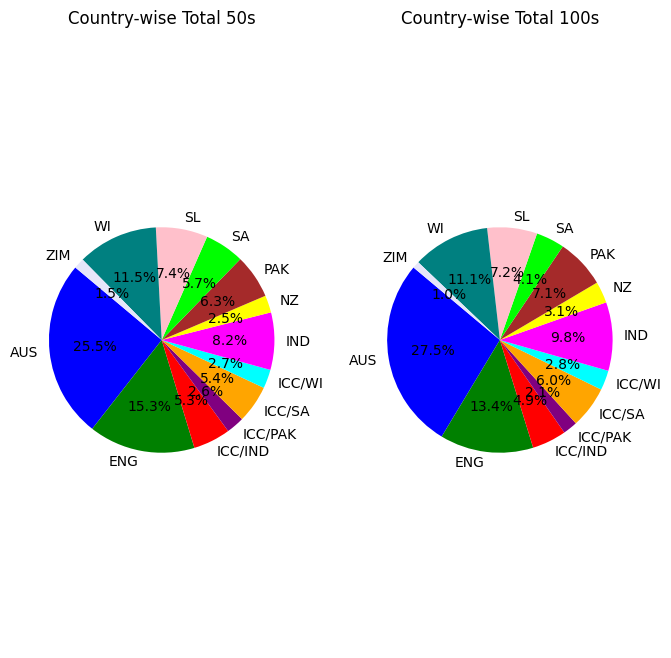

In [95]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)

plt.title('Country-wise Total 50s')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting using a pie chart
plt.pie(country_stats['50'], labels = country_stats['Country'],colors=colors,
        autopct='%1.1f%%', startangle=140)


plt.subplot(1, 2, 2)

plt.title('Country-wise Total 100s')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting using a pie chart
plt.pie(country_stats['100'], labels = country_stats['Country'],colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.show()
